In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle
import sklearn
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [3]:
import keras 
from keras.api.models import Sequential
from keras.api.layers import Dense
from keras.api.callbacks import EarlyStopping

In [4]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 14

In [5]:
file_csv = "D:/du lieu o cu/Statistics and Machine Learning Course/TH5/Walmart.csv"
df = pd.read_csv(file_csv)
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [7]:
df = df.drop(columns = ['Store', 'Date'])

Log Transformation

In [8]:
print(df.dtypes)


Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


In [9]:
df = df.apply(lambda x: np.log(x + 1))
df.describe()

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6435.000000,6434.000000,6435.000000,6435.000000,6435.000000
mean,13.701910,0.048472,4.066455,1.466513,5.124311,2.176955
std,0.588301,0.176786,0.356409,0.106687,0.231237,0.198970
min,12.254802,0.000000,1.877937,1.244731,4.844691,1.584940
25%,13.223748,0.000000,3.881461,1.369402,4.888355,2.065723
50%,13.775466,0.000000,4.153792,1.491780,5.212849,2.183126
75%,14.166280,0.000000,4.330009,1.554982,5.364776,2.264052
max,15.155417,0.693147,4.616506,1.698913,5.430366,2.728702


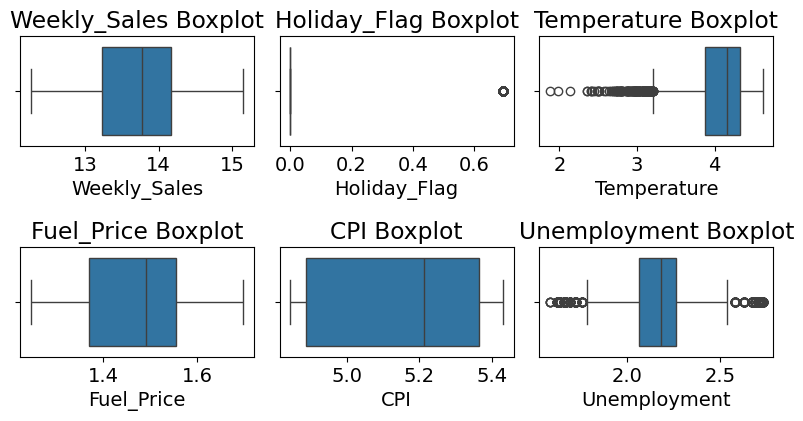

In [10]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(8, 6))
for i, j in enumerate(df.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

Xử lý outliers bằng Winsorization 

In [11]:
# Hàm Winsorization cho các cột được chọn
def winsorize_columns(df, columns, lower_percentile=0.05, upper_percentile=0.95):
    for col in columns:
        df[col] = stats.mstats.winsorize(df[col], limits=[lower_percentile, 1-upper_percentile])
    return df

# Các cột cần Winsorization
columns_to_winsorize = ['Temperature', 'Unemployment']

# Áp dụng Winsorization cho các cột được chọn
df = winsorize_columns(df, columns_to_winsorize)

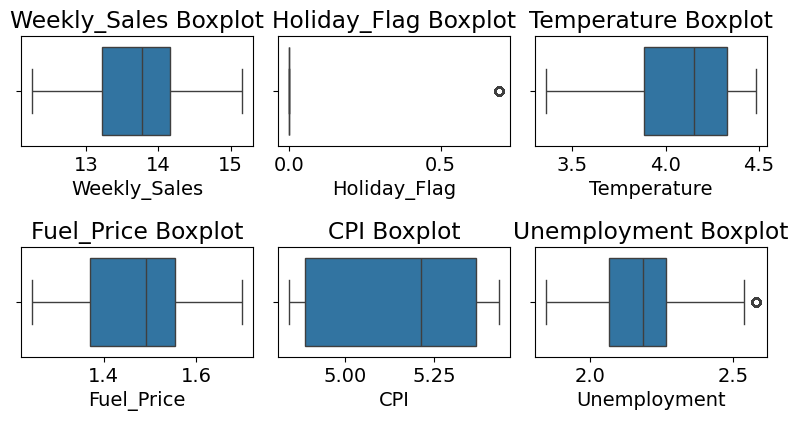

In [12]:
# Visualize the boxplot of each variable.
plt.figure(figsize=(8, 6))
for i, j in enumerate(df.describe().columns):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=df[j])
    plt.title('{} Boxplot'.format(j))
    plt.tight_layout()

plt.show()

In [13]:
# Xác định ngưỡng để loại bỏ giá trị bất thường bằng IQR (Interquartile Range)
Q1 = df['Unemployment'].quantile(0.25)
Q3 = df['Unemployment'].quantile(0.75)
IQR = Q3 - Q1

# Định nghĩa giá trị giới hạn
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Loại bỏ các giá trị bất thường
df = df[(df['Unemployment'] >= lower_bound) & (df['Unemployment'] <= upper_bound)]

# Hiển thị kết quả sau khi loại bỏ
df


,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,14.312455,0.000000,3.768384,1.273126,5.357041,2.208934
1,14.311400,0.693147,3.676554,1.266384,5.357728,2.208934
2,14.292967,0.000000,3.711863,1.256755,5.357949,2.208934
3,14.158908,0.000000,3.863463,1.270041,5.358093,2.208934
4,14.256862,0.000000,3.860730,1.287854,5.358237,2.208934
...,...,...,...,...,...,...
6430,13.477482,0.000000,4.187835,1.608838,5.262760,2.270475
6431,13.505523,0.000000,4.187987,1.606433,5.263573,2.268718
6432,13.506898,0.000000,4.015842,1.609438,5.264384,2.268718
6433,13.484401,0.000000,4.051263,1.603219,5.264403,2.268718


Normalization

In [14]:
# Shuffle toàn bộ DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [15]:
X = df[['Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
y = df['Weekly_Sales']

# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert training data into numpy
inputs_scaled = np.array(X_train_scaled)
outputs = np.array(y_train).reshape(-1, 1)

#vConvert testing data into numpy 
inputs_scaled_test = np.array(X_test_scaled)
outputs_test = np.array(y_test).reshape(-1, 1)

Selt-building ANN

In [16]:
# Hyperparameters for training
epochs = 100  
learning_rate = 0.00001  
# batch_size = 3

In [17]:
class SimpleNeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_hidden_input = np.random.rand(input_size, hidden_size)
        self.weights_hidden_out = np.random.rand(hidden_size, output_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.bias_output = np.zeros((1, output_size))

    @staticmethod
    def relu(x):
        return np.maximum(0, x) 

    @staticmethod
    def relu_derivative(x):
        return np.where(x > 0, 1, 0)  
    
    def forward(self, X):
        # Forward pass using ReLU activation
        self.hidden_layer_values = np.dot(X, self.weights_hidden_input) + self.bias_hidden
        self.hidden_layer_output = self.relu(self.hidden_layer_values)
        self.output_layer_values = np.dot(self.hidden_layer_output, self.weights_hidden_out) + self.bias_output
        return self.output_layer_values  
    
    def backward(self, X, y, predicted):
        # Backward pass (MSE loss derivative)
        dS_out = predicted - y
        dW_out = np.dot(self.hidden_layer_output.T, dS_out)
        db_out = np.sum(dS_out, axis=0, keepdims=True)
        dS_hidden = np.dot(dS_out, self.weights_hidden_out.T) * self.relu_derivative(self.hidden_layer_output)
        dW_hidden = np.dot(X.T, dS_hidden)
        db_hidden = np.sum(dS_hidden, axis=0, keepdims=True)
        return dW_hidden, dW_out, db_hidden, db_out
    
    def update(self, dW_hidden, dW_out, db_hidden, db_out):
        # Update weights and biases using gradients
        self.weights_hidden_input -= learning_rate * dW_hidden
        self.weights_hidden_out -= learning_rate * dW_out
        self.bias_hidden -= learning_rate * db_hidden
        self.bias_output -= learning_rate * db_out

    def predict(self, X):
        # Prediction function
        return self.forward(X)


In [18]:
model = SimpleNeuralNetwork(inputs_scaled.shape[1], 10, outputs.shape[1]) 

In [19]:
# Training loop
cost_history = []
for epoch in range(epochs):
    # Forward pass
    predicted = model.forward(inputs_scaled)

    # Calculate loss (Mean Squared Error)
    cost = np.mean((predicted - outputs) ** 2)
    cost_history.append(cost)

    # Backward pass and update weights
    dW1, dW2, db1, db2 = model.backward(inputs_scaled, outputs, predicted)
    model.update(dW1, dW2, db1, db2)

    # Print loss for each epoch
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Cost: {cost}")



Epoch 0, Cost: 123.17987443972397
Epoch 10, Cost: 8.126710323295285
Epoch 20, Cost: 2.1749081687091874
Epoch 30, Cost: 1.3940672272871355
Epoch 40, Cost: 1.063332379669936
Epoch 50, Cost: 0.884080590912239
Epoch 60, Cost: 0.7695705978643441
Epoch 70, Cost: 0.690262742613265
Epoch 80, Cost: 0.6311015151543212
Epoch 90, Cost: 0.5849882498071304


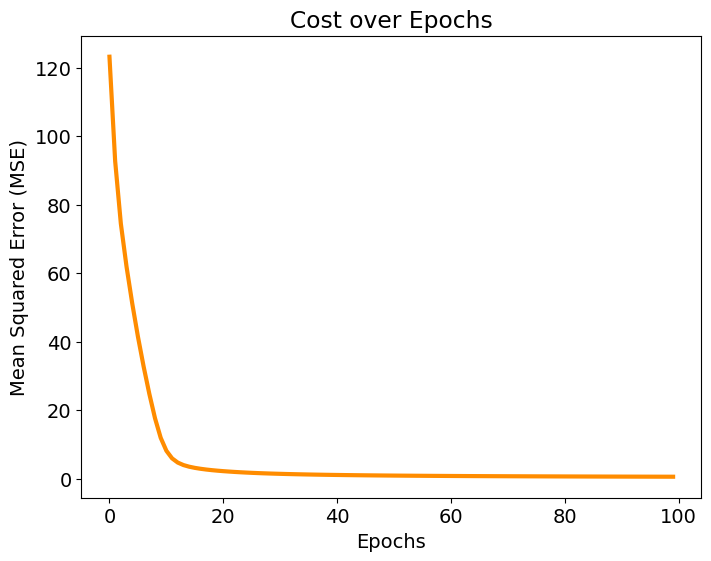

In [20]:
# Plotting cost history
plt.plot(cost_history, lw=3, color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cost over Epochs')
plt.show()

In [21]:
# Evaluation on the training set
predicted_output = model.predict(inputs_scaled)

# Calculate evaluation metrics on training set
mse_train = mean_squared_error(outputs, predicted_output)
mae_train = mean_absolute_error(outputs, predicted_output)

# Print evaluation results
print(f'Training MSE: {mse_train}')
print(f'Training MAE: {mae_train}')

Training MSE: 0.5480794066194642
Training MAE: 0.6110582965062471


In [22]:

# Evaluate on test set
predicted_test_output = model.predict(inputs_scaled_test)

# Calculate evaluation metrics on test set
mse_test = mean_squared_error(outputs_test, predicted_test_output)
mae_test = mean_absolute_error(outputs_test, predicted_test_output)

# Print test set evaluation
print(f'Test MSE: {mse_test}')
print(f'Test MAE: {mae_test}')

Test MSE: 0.5735278714240621
Test MAE: 0.6239788103226084


Libraries

In [23]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Build the ANN model
ann_model = models.Sequential([
    layers.Input(shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)  # Output layer for regression
])

# Compile the model
ann_model.compile(optimizer='adam', loss='mse')

# Train the model
history = ann_model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Predict on test set
y_pred_ann = ann_model.predict(X_test_scaled)

# Evaluate the ANN model
mse_ann = mean_squared_error(y_test, y_pred_ann)
mae_test = mean_absolute_error(y_test, y_pred_ann)
print(f'MSE (ANN): {mse_ann}')
print(f'MAE (ANN): {mae_test}')



Epoch 1/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 145.7077 - val_loss: 7.2431
Epoch 2/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 4.9072 - val_loss: 2.8383
Epoch 3/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.9858 - val_loss: 2.0717
Epoch 4/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.1491 - val_loss: 1.6382
Epoch 5/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7479 - val_loss: 1.3609
Epoch 6/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.4465 - val_loss: 1.1626
Epoch 7/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2670 - val_loss: 1.0300
Epoch 8/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0641 - val_loss: 0.9035
Epoch 9/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9604 - val_loss: 0.8215
Epoch 10/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8311 - val_loss: 0.7241
Epoch 11/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7204 - val_loss: 0.6670
Epoch 12/50
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/st

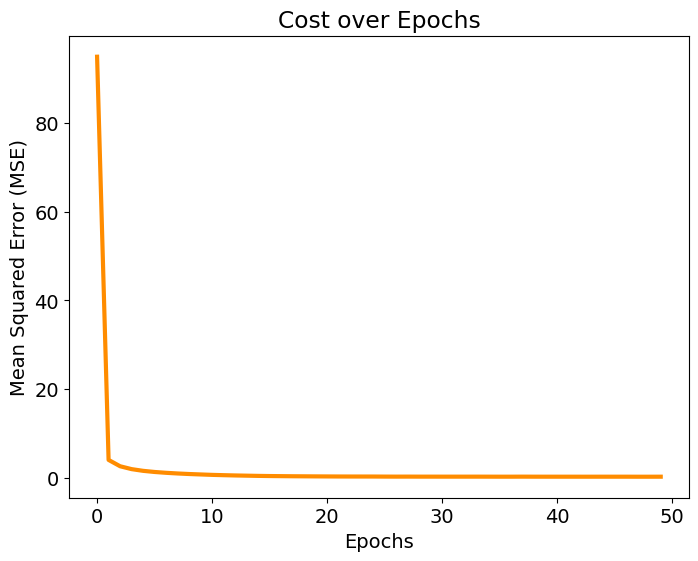

In [24]:
import matplotlib.pyplot as plt

# Plotting cost history (MSE)
plt.plot(history.history['loss'], lw=3, color='darkorange')
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Cost over Epochs')
plt.show()
